In [2]:
!pip install backtesting --upgrade --quiet

In [3]:
!pip install pandas_datareader --upgrade --quiet

In [4]:
!pip install yfinance --upgrade --quiet

In [5]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

In [6]:
end = dt.datetime.now()
start = end - dt.timedelta(days=5000)
start , end

(datetime.datetime(2009, 12, 25, 2, 49, 31, 839976),
 datetime.datetime(2023, 9, 3, 2, 49, 31, 839976))

In [7]:
stocklist = ['CBA','NAB','WBC','ANZ']
stocks = [i + '.AX' for i in stocklist]
stocks

['CBA.AX', 'NAB.AX', 'WBC.AX', 'ANZ.AX']

In [8]:
yf.pdr_override()
df= pdr.get_data_yahoo(stocks, start, end)
df.head()


[*********************100%%**********************]  4 of 4 completed


Adj Close                                       Close             \
               ANZ.AX     CBA.AX     NAB.AX     WBC.AX     ANZ.AX     CBA.AX   
Date                                                                           
2009-12-29  10.793214  26.474848  11.339957  12.333466  22.700001  54.206310   
2009-12-30  10.812235  26.435976  11.348299  12.270341  22.740000  54.126740   
2009-12-31  10.878800  26.644875  11.431746  12.284909  22.879999  54.554424   
2010-01-04  10.883553  26.654579  11.431746  12.284909  22.889999  54.574314   
2010-01-05  10.935855  27.057775  11.577770  12.386880  23.000000  55.399841   

                                       High             ...        Low  \
               NAB.AX     WBC.AX     ANZ.AX     CBA.AX  ...     NAB.AX   
Date                                                    ...              
2009-12-29  25.855858  25.228247  22.790001  54.504692  ...  25.494371   
2009-12-30  25.874884  25.099125  22.930000  54.653885  ...  25.798780   
2009-12-31  26.065140  25.128922  22.910000  54.614101  ...  25.922447   
2010-01-04  26.065140  25.128922  22.889999  54.673779  ...  25.893909   
2010-01-05  26.398088  25.337502  23.090000  55.499306  ...  26.236370   

                            Open                                    Volume  \
               WBC.AX     ANZ.AX     CBA.AX     NAB.AX     WBC.AX   ANZ.AX   
Date                                                                         
2009-12-29  25.138853  22.620001  53.907925  25.627550  25.327568  5678564   
2009-12-30  25.049463  22.719999  54.524586  25.950987  25.297771  2806023   
2009-12-31  25.049463  22.820000  54.375393  26.027088  25.228247  1895633   
2010-01-04  25.079260  22.790001  54.275932  25.970013  25.178583  3022350   
2010-01-05  25.218313  22.950001  54.753345  26.331499  25.426893  5566262   

                                         
             CBA.AX   NAB.AX     WBC.AX  
Date                                     
2009-12-29  1903125  4757711  3851419.0  
2009-12-30   959057  2651905  2458764.0  
2009-12-31  1085148  2364583  2338298.0  
2010-01-04   992762  2648070  2765223.0  
2010-01-05  3163161  4593662  4773662.0  

[5 rows x 24 columns]

In [9]:
df.index

DatetimeIndex(['2009-12-29', '2009-12-30', '2009-12-31', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-11', '2010-01-12',
               ...
               '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24',
               '2023-08-25', '2023-08-28', '2023-08-29', '2023-08-30',
               '2023-08-31', '2023-09-01'],
              dtype='datetime64[ns]', name='Date', length=3458, freq=None)

In [10]:
df.columns

MultiIndex([('Adj Close', 'ANZ.AX'),
            ('Adj Close', 'CBA.AX'),
            ('Adj Close', 'NAB.AX'),
            ('Adj Close', 'WBC.AX'),
            (    'Close', 'ANZ.AX'),
            (    'Close', 'CBA.AX'),
            (    'Close', 'NAB.AX'),
            (    'Close', 'WBC.AX'),
            (     'High', 'ANZ.AX'),
            (     'High', 'CBA.AX'),
            (     'High', 'NAB.AX'),
            (     'High', 'WBC.AX'),
            (      'Low', 'ANZ.AX'),
            (      'Low', 'CBA.AX'),
            (      'Low', 'NAB.AX'),
            (      'Low', 'WBC.AX'),
            (     'Open', 'ANZ.AX'),
            (     'Open', 'CBA.AX'),
            (     'Open', 'NAB.AX'),
            (     'Open', 'WBC.AX'),
            (   'Volume', 'ANZ.AX'),
            (   'Volume', 'CBA.AX'),
            (   'Volume', 'NAB.AX'),
            (   'Volume', 'WBC.AX')],
           )

In [11]:
close = df.Close
close.head()

,ANZ.AX,CBA.AX,NAB.AX,WBC.AX
Date,,,,
2009-12-29,22.700001,54.206310,25.855858,25.228247
2009-12-30,22.740000,54.126740,25.874884,25.099125
2009-12-31,22.879999,54.554424,26.065140,25.128922
2010-01-04,22.889999,54.574314,26.065140,25.128922
2010-01-05,23.000000,55.399841,26.398088,25.337502


In [12]:
close.describe()

,ANZ.AX,CBA.AX,NAB.AX,WBC.AX
count,3458.000000,3458.000000,3458.000000,3457.000000
mean,26.329696,75.341480,27.270327,26.666396
std,4.057990,16.284898,4.092193,5.081727
min,14.100000,42.698658,13.880000,14.100000
25%,23.559999,65.664228,24.373892,22.397516
50%,26.530001,75.805000,27.499637,26.219999
75%,28.770000,84.124998,30.299999,31.010000
max,37.189999,111.150002,37.642250,39.620266


In [13]:
close[-100:].describe(percentiles= [0.1, 0.5, 0.9])

,ANZ.AX,CBA.AX,NAB.AX,WBC.AX
count,100.000000,100.000000,100.000000,100.000000
mean,24.164300,100.158000,27.243200,21.477400
std,0.845397,2.601508,1.173536,0.615785
min,22.680000,95.690002,25.160000,20.030001
10%,22.929000,97.099003,25.759000,20.674000
50%,24.130000,99.695000,27.110001,21.430000
90%,25.350000,104.434000,28.761000,22.280001
max,25.879999,106.529999,29.190001,22.570000


<Axes: xlabel='Date'>

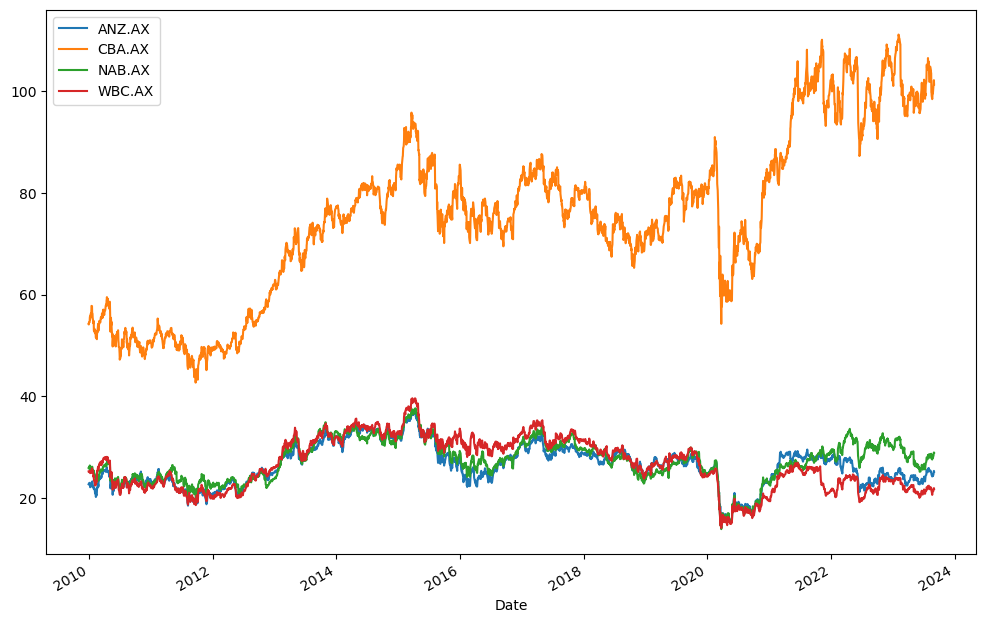

In [14]:
close.plot(figsize= (12,8))

In [15]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected = True)
pd.options.plotting.backend = 'plotly'

In [16]:
close.plot()

In [52]:
close['CBA.AX'].pct_change().plot(kind='hist')